## 와인 품질 분류 예측

### 1. 문제 이해

#### -1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train(6).csv", encoding = 'utf-8')
test = pd.read_csv("test(6).csv", encoding = 'utf-8')
submission = pd.read_csv("submission(6).csv", encoding = 'utf-8')

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [6]:
train.shape, test.shape

((5497, 14), (1000, 13))

train 파일 정보와 test 파일 정보를 확인한 결과, quality 값이 target임을 알 수 있음

또한, train 데이터와 test 데이터에 결측치가 없다는 것을 알 수 있음

테스트 데이터에 quality 피처가 없으므로 모델 훈련 시에도 훈련 데이터의 quality 피처를 빼야 함

In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    1000 non-null   int64
 1   quality  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


index 값은 데이터를 구분하는 역할만 하기 때문에 타깃값 예측에는 아무런 도움을 주지 않으므로 모델 훈련 시 제거

### 2. 탐색적 데이터 분석

### -1. 데이터 시각화

In [8]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='type', ylabel='count'>

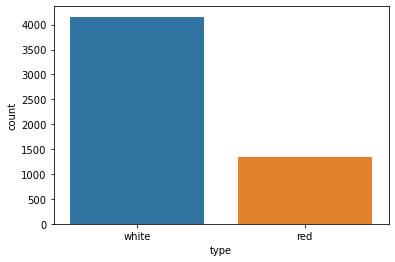

In [9]:
sns.countplot(x = 'type', data = train)

type 피처는 범주형 데이터이므로 타깃 피처와의 상관관계를 파악하기 위해 수치형 데이터로 변환해야 함

In [10]:
train_check = train.copy()
train_check['type'] = train_check['type'].map({'white':0,
                                               'red': 1})
train_check.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


<AxesSubplot:xlabel='type', ylabel='quality'>

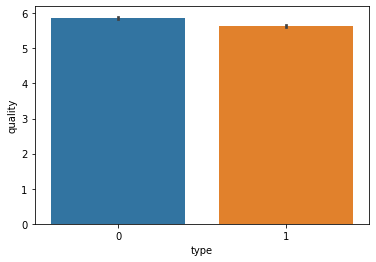

In [11]:
sns.barplot(data = train_check, x = 'type', y = 'quality')

<AxesSubplot:xlabel='quality', ylabel='count'>

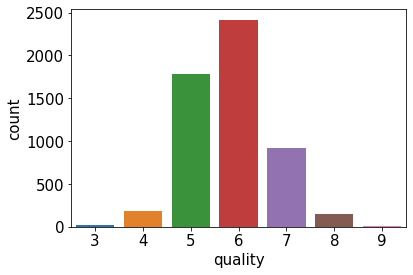

In [12]:
#타깃값의 분포도 그리기

mpl.rc('font', size = 15)
sns.countplot(x = 'quality', data = train)

In [13]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

타깃 피처인 quality는 3부터 9까지 존재하며, 정규분포를 따르고 있으므로 로그변환할 필요 없음

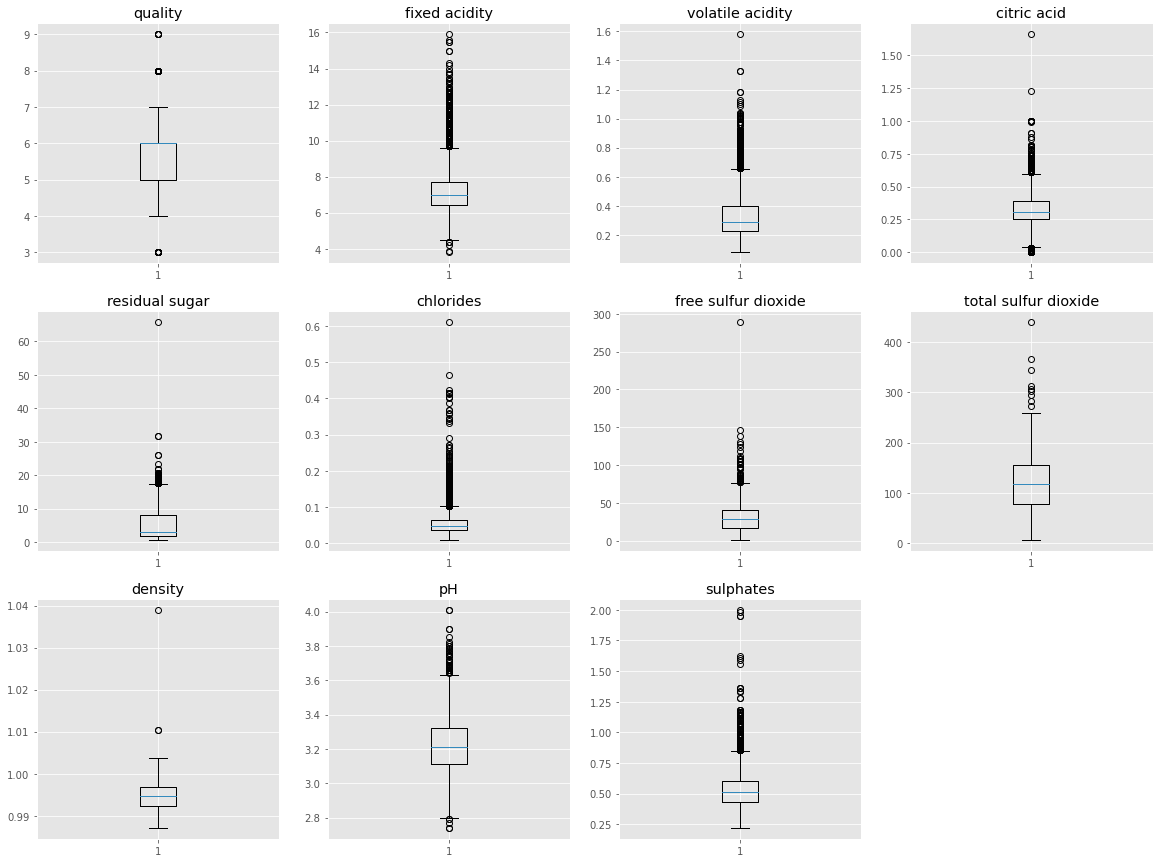

In [14]:
plt.style.use("ggplot")

plt.figure(figsize=(20,15))

# id, type, quality는 제외하고 시각화
cols = train.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train[cols[i]])
plt.show()

<AxesSubplot:xlabel='density', ylabel='quality'>

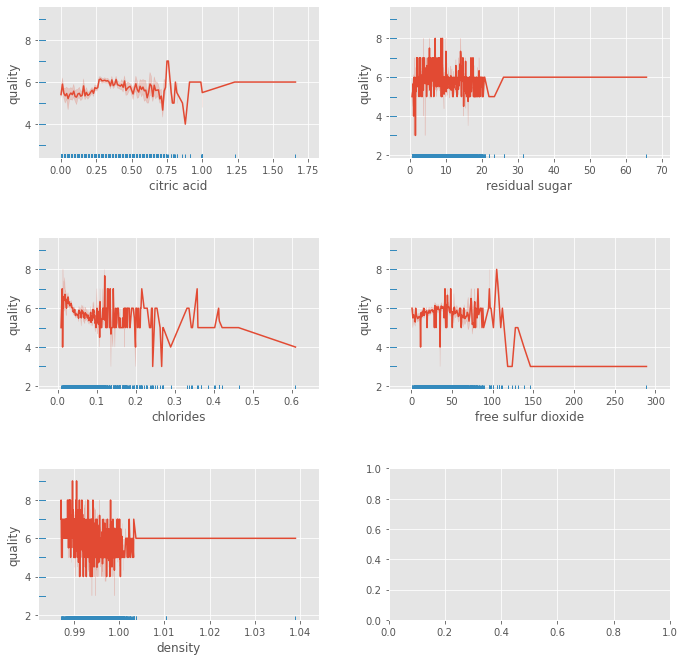

In [15]:
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.lineplot(x='citric acid', y = 'quality', data = train, ax = axes[0, 0])
sns.rugplot(x='citric acid', y = 'quality', data = train, ax = axes[0, 0])
sns.lineplot(x='residual sugar', y = 'quality', data = train, ax = axes[0, 1])
sns.rugplot(x='residual sugar', y = 'quality', data = train, ax = axes[0, 1])
sns.lineplot(x='chlorides', y = 'quality', data = train, ax = axes[1, 0])
sns.rugplot(x='chlorides', y = 'quality', data = train, ax = axes[1, 0])
sns.lineplot(x='free sulfur dioxide', y = 'quality', data = train, ax = axes[1, 1])
sns.rugplot(x='free sulfur dioxide', y = 'quality', data = train, ax = axes[1, 1])
sns.lineplot(x='density', y = 'quality', data = train, ax = axes[2, 0])
sns.rugplot(x='density', y = 'quality', data = train, ax = axes[2, 0])

타깃값과 각 변수들이 어떤 상관관계를 갖는지 알아보기

<AxesSubplot:>

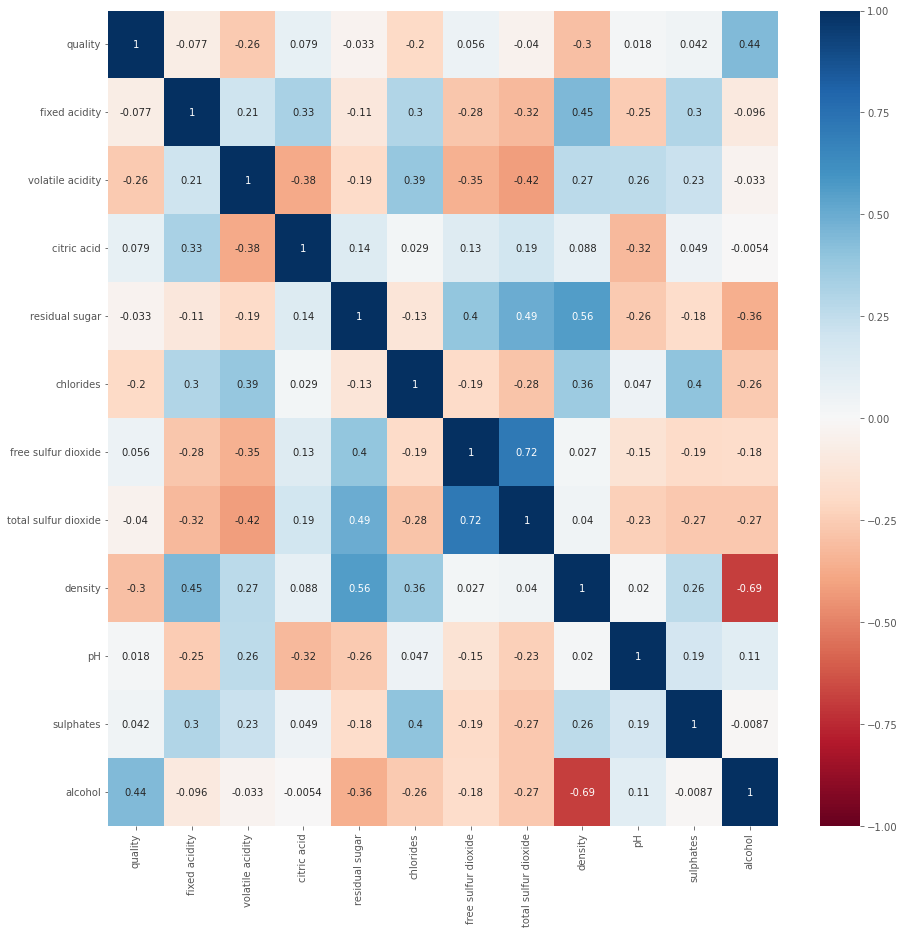

In [16]:
corrmat = train[['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corrmat, annot=True,vmin=-1.0,vmax=1.0, cmap = 'RdBu')

타깃변수와 상관관계가 있다고 판단되는 피처에 이상치가 있는지 확인하기

In [17]:
#이상치를 확인하는 함수

def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    Q1, Q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = Q3 - Q1    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = Q1 - cut_off, Q3 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

히트맵을 통해 타깃값과 상관계수의 크기가 0.2 이상인 피처들의 이상치 확인하기

In [18]:
outlier_iqr(train_check, 'volatile acidity')

IQR은 0.17 이다.
lower bound 값은 -0.024999999999999994 이다.
upper bound 값은 0.655 이다.
총 이상치 개수는 314 이다.


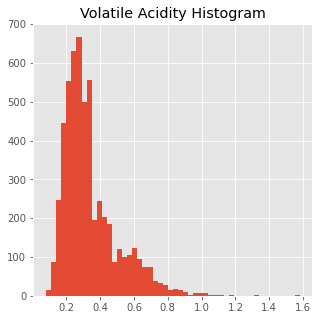

In [19]:
plt.figure(figsize=(5,5))
plt.hist(train['volatile acidity'], bins=50)
plt.title('Volatile Acidity Histogram')
plt.show()

In [20]:
outlier_iqr(train_check, 'density')

IQR은 0.004630000000000023 이다.
lower bound 값은 0.985355 이다.
upper bound 값은 1.003875 이다.
총 이상치 개수는 3 이다.


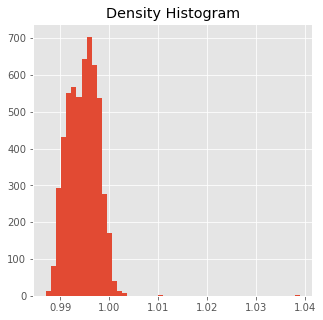

In [21]:
plt.figure(figsize=(5,5))
plt.hist(train['density'], bins=50)
plt.title('Density Histogram')
plt.show()

In [22]:
outlier_iqr(train_check, 'chlorides')

IQR은 0.026000000000000002 이다.
lower bound 값은 -0.0010000000000000078 이다.
upper bound 값은 0.10300000000000001 이다.
총 이상치 개수는 259 이다.


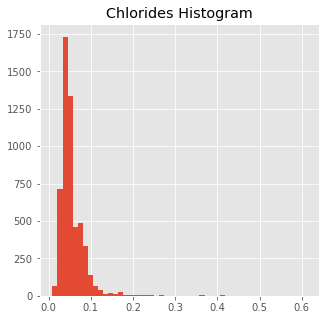

In [23]:
plt.figure(figsize=(5,5))
plt.hist(train['chlorides'], bins=50)
plt.title('Chlorides Histogram')
plt.show()

In [24]:
outlier_iqr(train_check, 'alcohol')

IQR은 1.8000000000000007 이다.
lower bound 값은 6.799999999999999 이다.
upper bound 값은 14.000000000000002 이다.
총 이상치 개수는 3 이다.


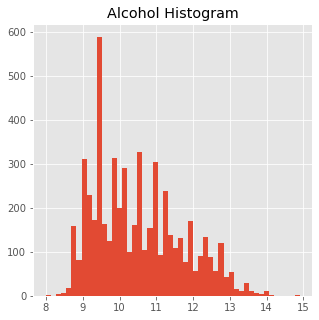

In [25]:
plt.figure(figsize=(5,5))
plt.hist(train['alcohol'], bins=50)
plt.title('Alcohol Histogram')
plt.show()

타깃값과 다소 높은 상관관계를 보였던 값들 중 volatile acidity, density, chlorides의 분포를 확인했을 때 치우친 분포가 나타남

따라서 로그 스케일 과정이 필요하며, 각 피처들의 분포가 다양하기 때문에 피처스케일링 필요함

그 후에도 이상치에 변함이 없다면, quality와 다소 높은 상관관계를 보이는 변수의 이상치를 제거해줘야 함

type 피처는 범주형 데이터이므로 타깃 피처와의 상관관계를 파악하기 위해 수치형 데이터로 변환해야 함

index 변수는 타깃값을 예측하는데 도움이 되지 않는 피처이므로 제거해야 함 (후에 제출시, 값을 구분하는 변수로 활용)

### 3. 모델 훈련

### -1. 훈련을 위한 데이터 만들기

In [43]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('quality', axis=1) 
all_data

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,1.722767,-0.363843,0.244949,1.916923,-3.170086,2.197225,84.0,-0.005696,1.235471,-0.820981,2.322388,white
1,1,2.174752,-0.494296,0.374166,0.875469,-2.703063,2.302585,42.0,-0.003105,1.160021,-0.527633,2.251292,red
2,2,2.066863,-1.560648,0.624500,0.693147,-2.864704,3.044522,138.0,-0.008274,1.115142,-0.653926,2.388763,white
3,3,1.945910,-1.560648,0.556776,1.791759,-3.079114,3.367296,108.0,-0.006119,1.181727,-0.693147,2.379546,white
4,4,2.054124,-0.916291,0.509902,2.251292,-2.830218,3.465736,178.0,-0.004510,1.111858,-0.843970,2.388763,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,7.100000,0.590000,0.020000,2.300000,0.082000,24.000000,94.0,0.997440,3.550000,0.530000,9.700000,red
6493,996,8.700000,0.150000,0.300000,1.600000,0.046000,29.000000,130.0,0.994200,3.220000,0.380000,9.800000,white
6494,997,8.800000,0.660000,0.260000,1.700000,0.074000,4.000000,23.0,0.997100,3.150000,0.740000,9.200000,red
6495,998,7.000000,0.420000,0.190000,2.300000,0.071000,18.000000,36.0,0.994760,3.390000,0.560000,10.900000,red


#### 로그 스케일

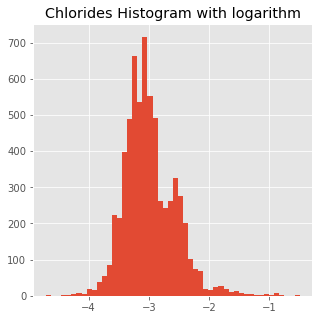

In [27]:
#chlorides, volatile acidity, density 로그 스케일 결과
log_chlorides = np.log(all_data['chlorides'])

plt.figure(figsize=(5,5))
plt.hist(log_chlorides, bins=50)
plt.title('Chlorides Histogram with logarithm')
plt.show()

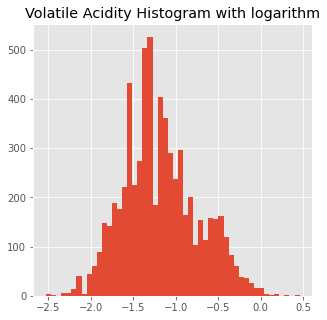

In [28]:
log_va = np.log(all_data['volatile acidity'])

plt.figure(figsize=(5,5))
plt.hist(log_va, bins=50)
plt.title('Volatile Acidity Histogram with logarithm')
plt.show()

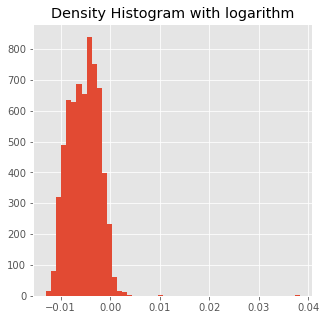

In [29]:
log_density = np.log(all_data['density'])

plt.figure(figsize=(5,5))
plt.hist(log_density, bins=50)
plt.title('Density Histogram with logarithm')
plt.show()

In [30]:
def logarithm_scaler(df):
    #로그 값으로 변환(log a 는 양수이므로 음수인 값들은 제곱근으로 변환해줌)
    epsilon = 1e-10
    for i in df.columns:
        if df[i].min() == 0:
            df[i] = np.sqrt(df[i])
        else:
            df[i] = np.log(df[i])
    return df

# log 변환이 필요없는 feature는 제외
transform_data = all_data.drop(columns=['index', 'type', 'total sulfur dioxide']) 

train[transform_data.columns] = logarithm_scaler(transform_data)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,1.722767,-0.363843,0.244949,1.916923,-3.170086,2.197225,84.0,-0.005696,1.235471,-0.820981,2.322388,white
1,1,5,2.174752,-0.494296,0.374166,0.875469,-2.703063,2.302585,42.0,-0.003105,1.160021,-0.527633,2.251292,red
2,2,5,2.066863,-1.560648,0.624500,0.693147,-2.864704,3.044522,138.0,-0.008274,1.115142,-0.653926,2.388763,white
3,3,6,1.945910,-1.560648,0.556776,1.791759,-3.079114,3.367296,108.0,-0.006119,1.181727,-0.693147,2.379546,white
4,4,6,2.054124,-0.916291,0.509902,2.251292,-2.830218,3.465736,178.0,-0.004510,1.111858,-0.843970,2.388763,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,2.041220,-1.897120,0.538516,0.262364,-3.540459,2.302585,64.0,-0.006823,1.208960,-0.941609,2.312535,white
5493,5493,6,1.840550,-1.714798,0.600000,0.182322,-3.381395,3.258097,111.0,-0.009303,1.150572,-0.673345,2.397895,white
5494,5494,7,2.054124,-1.897120,0.583095,0.095310,-3.352407,3.433987,93.0,-0.009081,1.121678,-0.328504,2.424803,white
5495,5495,5,1.887070,-0.891598,0.556776,0.470004,-3.170086,2.890372,101.0,-0.008083,1.141033,-0.891598,2.351375,white


#### 정규화 스케일

In [31]:
transform_data = all_data.drop(columns=['index','type']) 

# Standard Scaler 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_transform_data = scaler.fit_transform(transform_data)

all_data[transform_data.columns] = std_transform_data
all_data

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,-1.246058,2.158461,-1.779913,0.285188,-0.400614,-1.212828,-0.561677,-0.125610,1.377698,-0.613385,-0.244672,white
1,1,1.222442,1.642132,-1.229353,-0.639680,0.313042,-1.156484,-1.304809,0.734837,-0.177272,0.394717,-0.831615,red
2,2,0.528176,-0.787650,0.491146,-0.723758,0.027580,-0.536697,0.393779,-0.979386,-1.048055,-0.075731,0.342271,white
3,3,-0.166089,-0.787650,-0.059414,0.117030,-0.286429,-0.085943,-0.137030,-0.265683,0.258120,-0.210144,0.258422,white
4,4,0.451036,0.366496,-0.403514,0.852721,0.084672,0.083090,1.101525,0.267928,-1.110254,-0.680592,0.342271,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,-0.088949,1.520643,-2.055193,-0.660699,0.741235,-0.367664,-0.384741,0.914930,2.061885,-0.008524,-0.663917,red
6493,996,1.145301,-1.152118,-0.128234,-0.807837,-0.286429,-0.085943,0.252230,-0.165631,0.009325,-1.016626,-0.580068,white
6494,997,1.222442,1.945855,-0.403514,-0.786818,0.512865,-1.494550,-1.640988,0.801538,-0.426067,1.402820,-1.083162,red
6495,998,-0.166089,0.487985,-0.885253,-0.660699,0.427227,-0.705730,-1.410971,0.021133,1.066704,0.193097,0.342271,red


#### 범주형 데이터 변환

In [44]:
all_data['type'] = all_data['type'].map({'white':0, 'red': 1})
all_data['type'] = all_data['type'].astype('float')
all_data.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,1.722767,-0.363843,0.244949,1.916923,-3.170086,2.197225,84.0,-0.005696,1.235471,-0.820981,2.322388,0.0
1,1,2.174752,-0.494296,0.374166,0.875469,-2.703063,2.302585,42.0,-0.003105,1.160021,-0.527633,2.251292,1.0
2,2,2.066863,-1.560648,0.624500,0.693147,-2.864704,3.044522,138.0,-0.008274,1.115142,-0.653926,2.388763,0.0
3,3,1.945910,-1.560648,0.556776,1.791759,-3.079114,3.367296,108.0,-0.006119,1.181727,-0.693147,2.379546,0.0
4,4,2.054124,-0.916291,0.509902,2.251292,-2.830218,3.465736,178.0,-0.004510,1.111858,-0.843970,2.388763,0.0


#### 데이터 나누기

In [49]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('quality', axis=1) 
all_data['type'] = all_data['type'].map({'white':0, 'red': 1})
all_data['type'] = all_data['type'].astype('float')

num_train = len(train)

X_train = all_data[:num_train]
X_test = all_data[num_train:]

y = train['quality']

print(X_train.shape)
print(X_test.shape)

(5497, 13)
(1000, 13)


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 558.4 KB


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

In [52]:
#분류문제이므로 로지스틱회귀 모델 활용
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [53]:
logistic_model.predict_proba(X_valid)

array([[1.28186682e-02, 1.96118971e-02, 2.99146848e-01, ...,
        1.41449930e-01, 5.20656826e-02, 1.67710030e-03],
       [2.34995881e-03, 2.16442677e-02, 3.47107077e-01, ...,
        1.55306664e-01, 2.62076939e-02, 6.40825156e-05],
       [4.93333921e-03, 3.39871207e-02, 2.49976616e-01, ...,
        1.62134978e-01, 1.78776966e-02, 7.21060810e-04],
       ...,
       [1.36302268e-02, 1.64292658e-02, 1.90922577e-01, ...,
        1.52556219e-01, 3.57755511e-02, 3.79512963e-03],
       [2.14622687e-02, 2.60737018e-02, 2.26605681e-01, ...,
        1.64684781e-01, 5.42292349e-02, 5.70858549e-03],
       [6.10646197e-04, 2.61449919e-02, 6.08148686e-01, ...,
        1.21525200e-01, 2.08225385e-02, 2.53851322e-06]])

In [54]:
logistic_model.predict(X_valid)

array([6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,

In [55]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [56]:
y_preds = logistic_model.predict(X_test)

In [57]:
submission['quality'] = y_preds
submission.to_csv('submission.csv')

#### 예측 결과, 품질의 값을 5, 6 이외의 값을 예측하지 못하는 것을 보아 
#### 데이터의 수가 부족하여 주로 많은 값을 가졌던 5, 6을 위주로 예측한 것으로 판단함. 
#### 이후의 성능 개선 과정을 거친다면 데이터 증강을 활용하여 예측 정확도를 높여야 할 필요가 있어보였음